<a href="https://colab.research.google.com/github/i2mmmmm/kaggle/blob/main/used_car_price/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Kaggle --upgrade

In [1]:
import os
os.environ['KAGGLE_USERNAME']='mmmmmlee'
os.environ['KAGGLE_KEY']='b4527f98e27813c6dae3fb199096dcb5'

In [2]:
!kaggle competitions download -c playground-series-s4e9

100% 7.84M/7.84M [00:01<00:00, 12.0MB/s]
100% 7.84M/7.84M [00:01<00:00, 7.29MB/s]


In [3]:
!unzip 'playground-series-s4e9.zip'

Archive:  playground-series-s4e9.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [ ]:
print(train.info())
print(train.describe())

##fuel_type null값 5,083개
##accident null값 2,452개
##clean_title null값 21,419개


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None
                  id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.3878

In [ ]:
# 각 column 의 고유값 갯수

col = train.columns

for i in col:
    print(train[i].nunique())

188533
57
1897
34
6651
7
1117
52
319
156
2
1
1569
1569


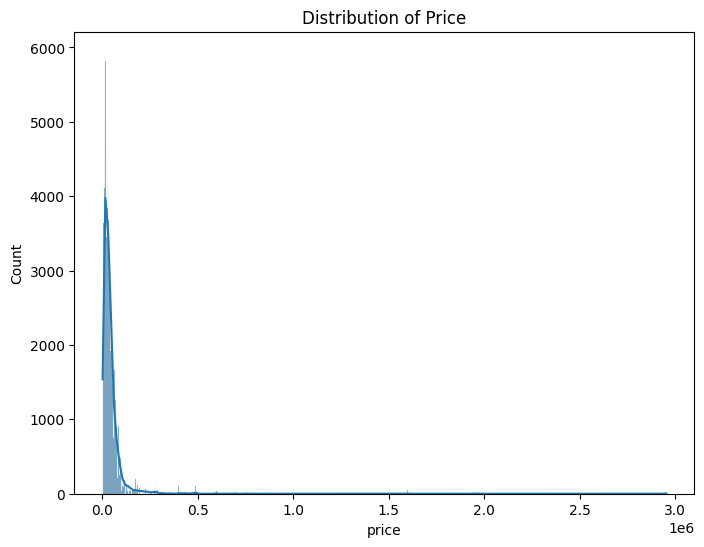

In [ ]:
##price = target 값 분포 확인하기

plt.figure(figsize=(8, 6))
sns.histplot(train['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

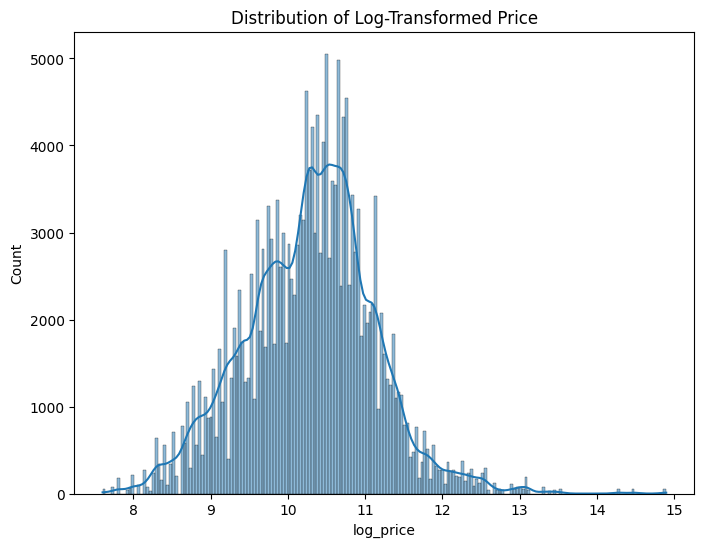

In [15]:
# 치우친 값을 확인하여, 로그 변환 진행
train['log_price'] = np.log1p(train['price'])  # log1p는 log(1 + x)를 적용하여 0인 값을 처리
plt.figure(figsize=(8, 6))
sns.histplot(train['log_price'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()

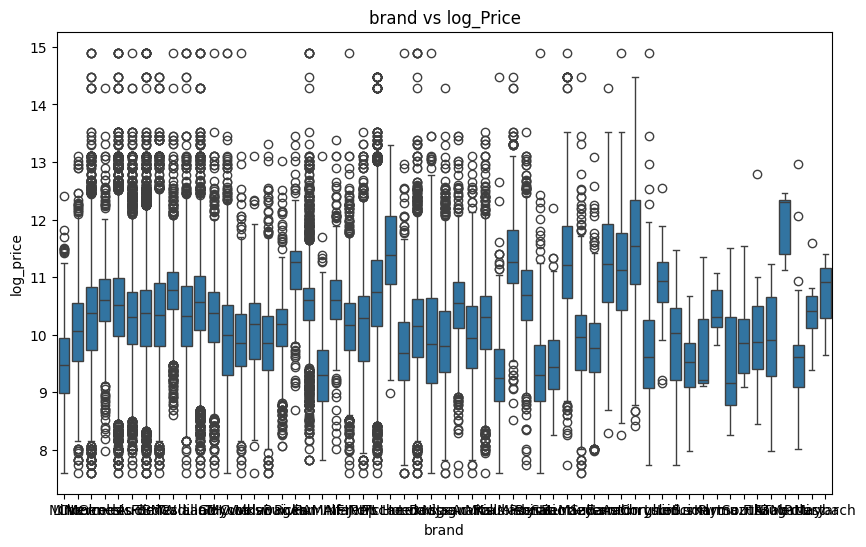

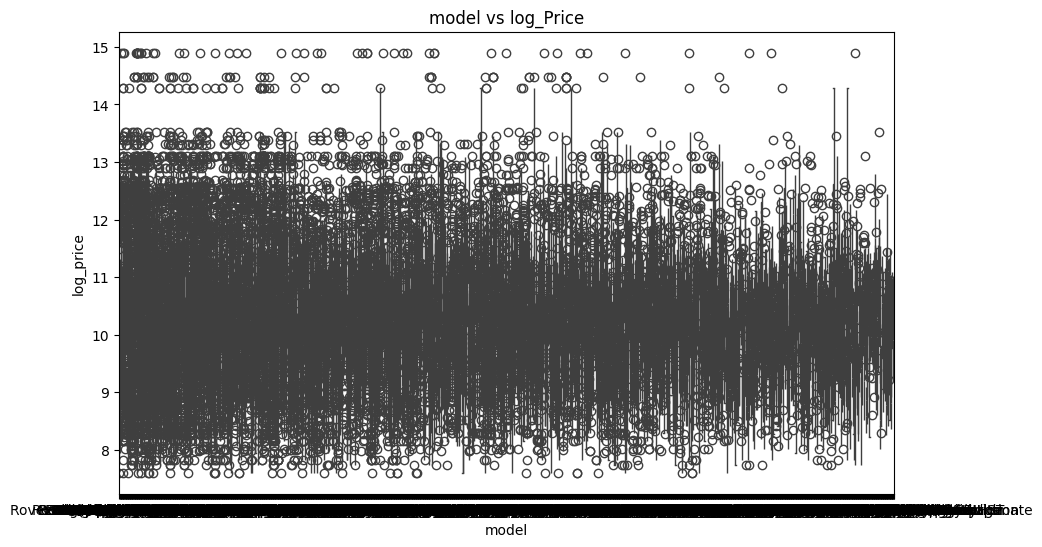

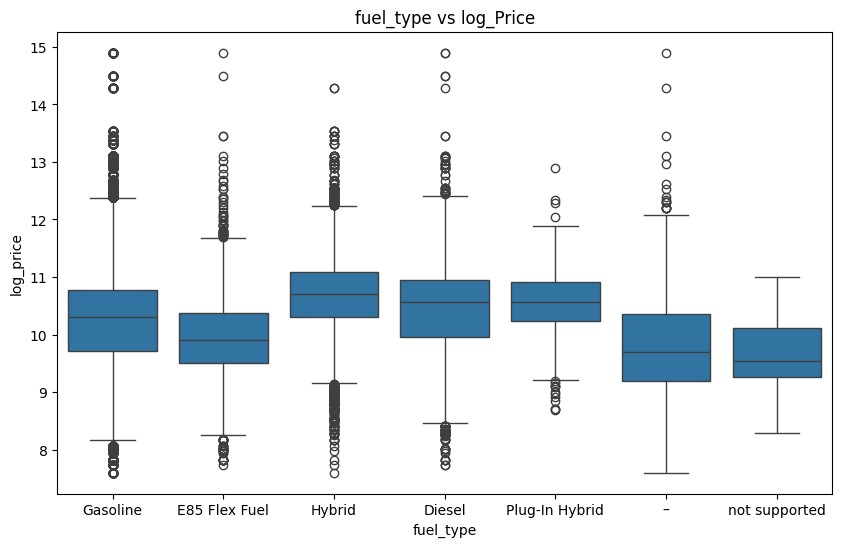

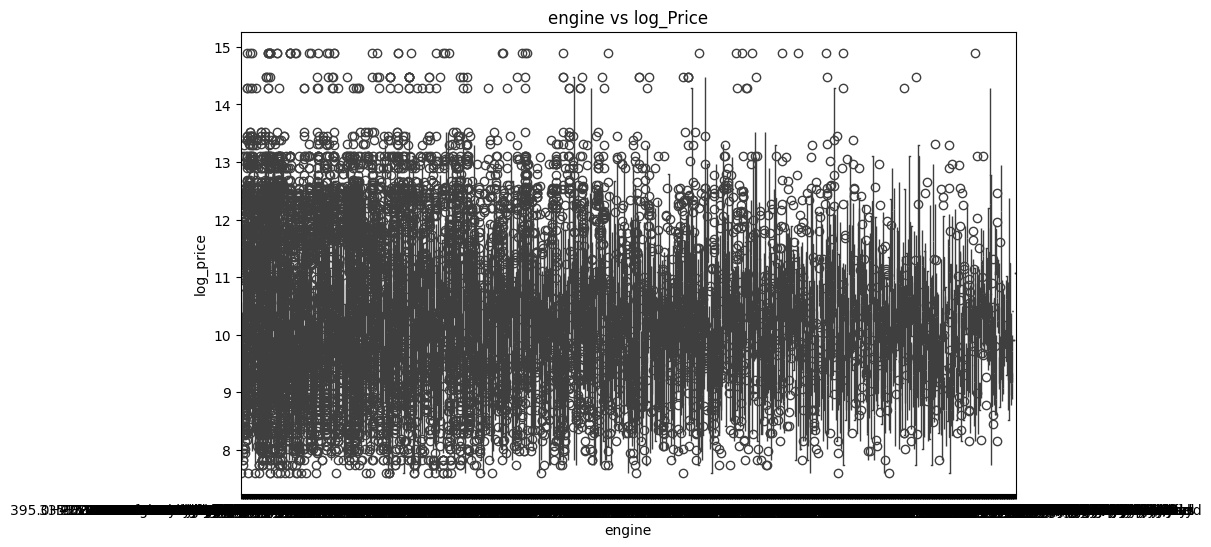

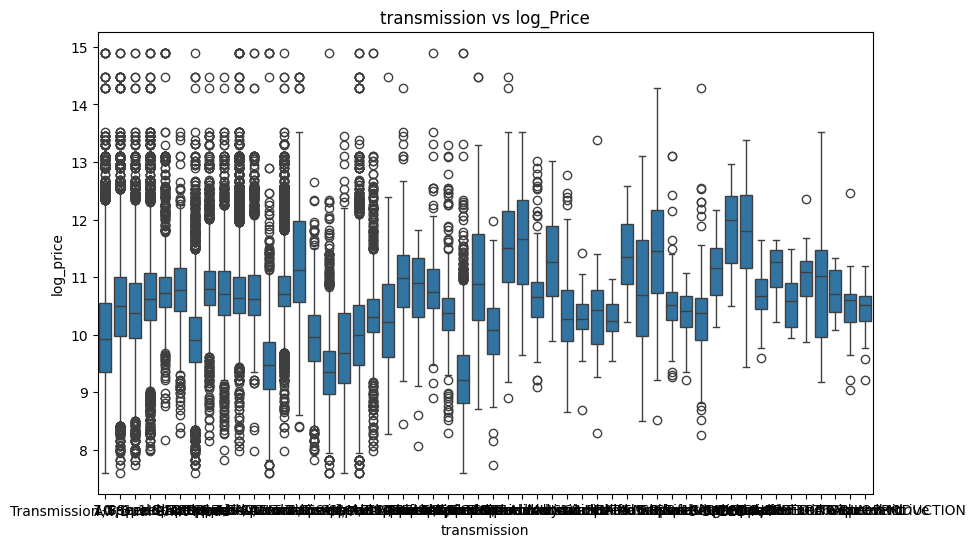

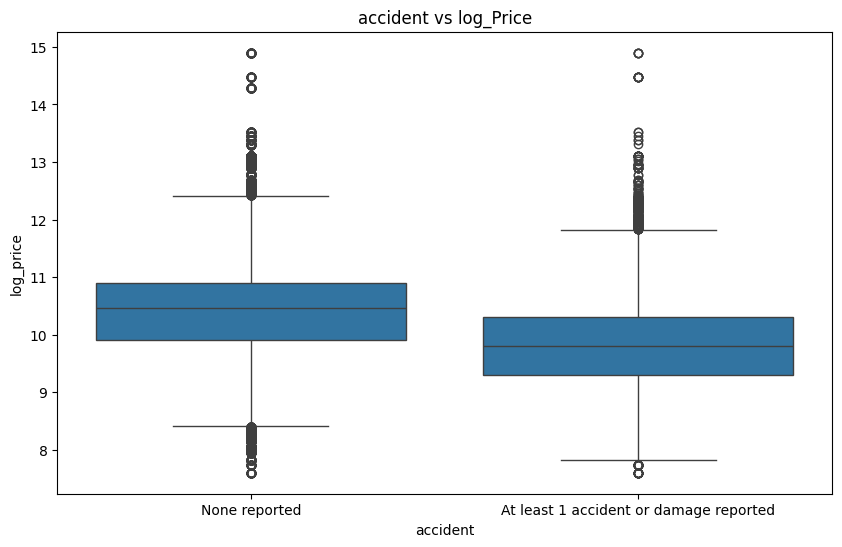

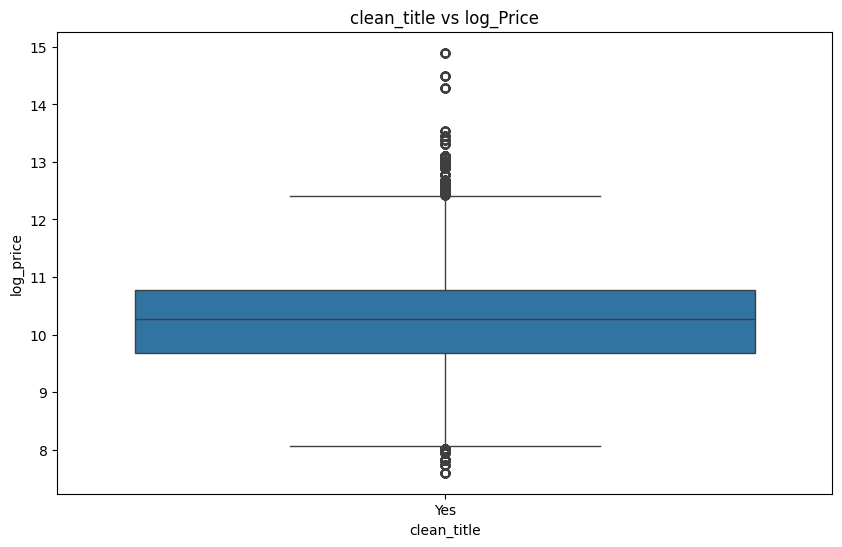

In [19]:
# 범주형
categorical_columns = ['brand','model','fuel_type','engine','transmission','accident','clean_title']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[column], y=train['log_price'])
    plt.title(f'{column} vs log_Price')
    plt.show()


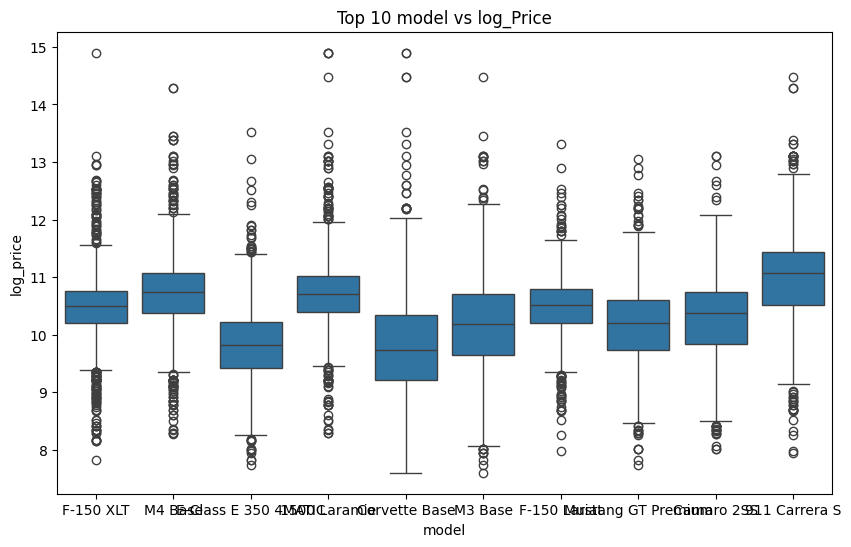

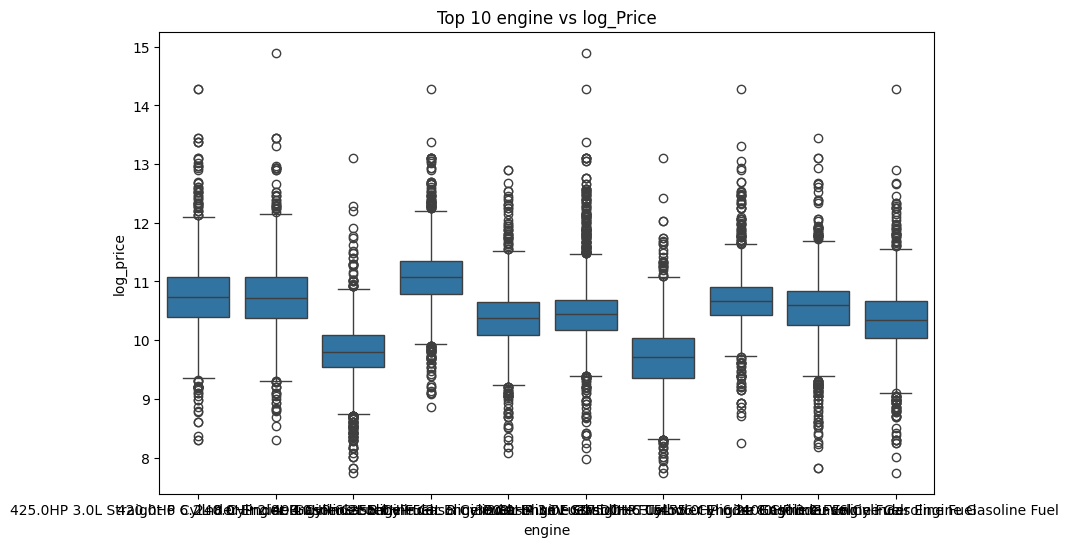

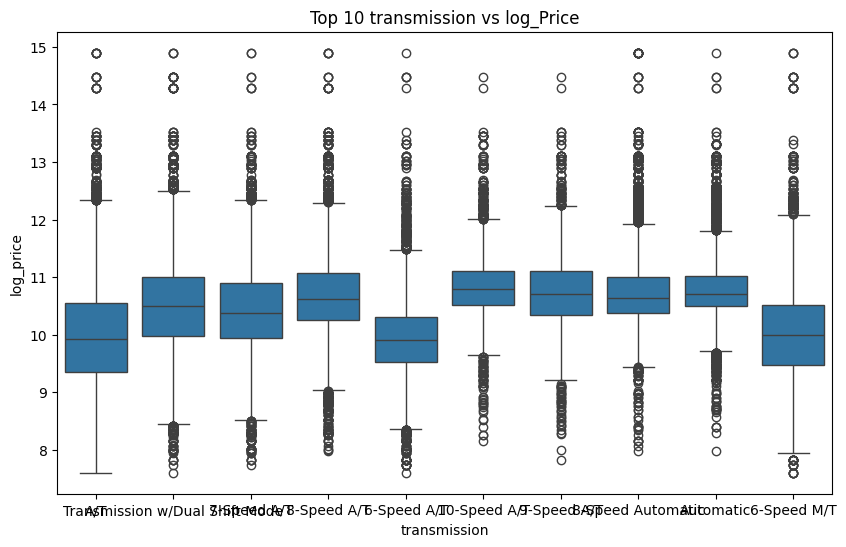

In [24]:
# 상위 10개의 범주만 사용하여 박스플롯 그리기
many_columns =['model','engine','transmission']
N = 10
for column in many_columns:
    plt.figure(figsize=(10, 6))
    top_categories = train[column].value_counts().index[:N]
    filtered_data = train[train[column].isin(top_categories)]

    sns.boxplot(x=filtered_data[column], y=filtered_data['log_price'])
    plt.title(f'Top {N} {column} vs log_Price')
    plt.show()

In [25]:
# 범주형 변수별 price 평균값을 계산하고 상위 10개를 출력

for column in many_columns:
    print(f"--- {column} ---")
    mean_log_price = train.groupby(column)['price'].mean().sort_values(ascending=False)
    print(mean_log_price.head(10))  # 상위 10개

--- model ---
model
Carrera GT Base                    356937.250000
Gallardo SE                        265551.272727
Phantom Drophead Coupe Drophead    250358.269231
Continental GT GT Speed            244661.833333
Martin DB7 Vantage Volante         229714.312500
Bentayga Speed                     220777.552632
Rover LR4 Lux                      215266.133333
Huracan EVO Coupe                  211282.961538
Flying Spur V8                     211032.000000
911 R                              206067.460317
Name: price, dtype: float64
--- engine ---
engine
5.3L V8 16V MPFI OHV Flexible Fuel                      438810.285714
6.8L V12 48V GDI DOHC                                   288679.888889
605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel           250087.538462
4.0L H6 24V GDI DOHC                                    221396.559567
6.0L W12 48V PDI DOHC Twin Turbo                        210264.102190
552.0HP 6.0L 12 Cylinder Engine Flex Fuel Capability    207748.166667
12 Cylinder Engine  

In [26]:
train.transmission.unique()
# 겹치는 값이 있고 데이터가 깔끔하지 않음
# 변속 기어수, 변속 모드(수동, 자동), 그 외 기능 나눌 필요가 있어 보임.

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [27]:
train.engine.unique()

# 엔진도 나눌 필요가 있어 보임

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

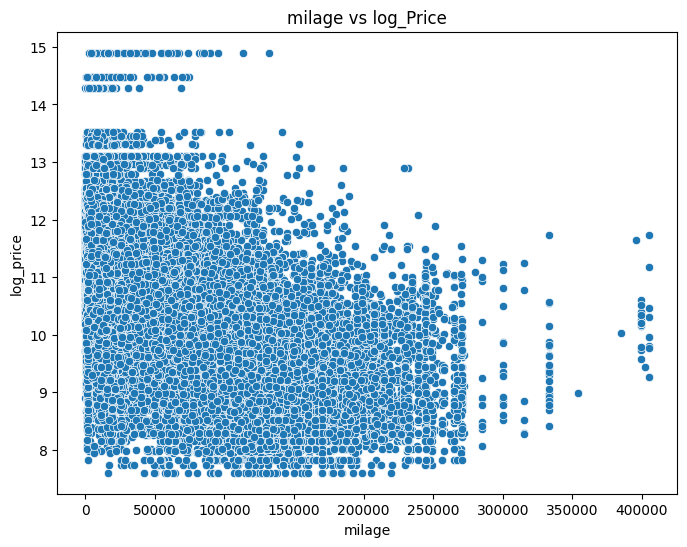

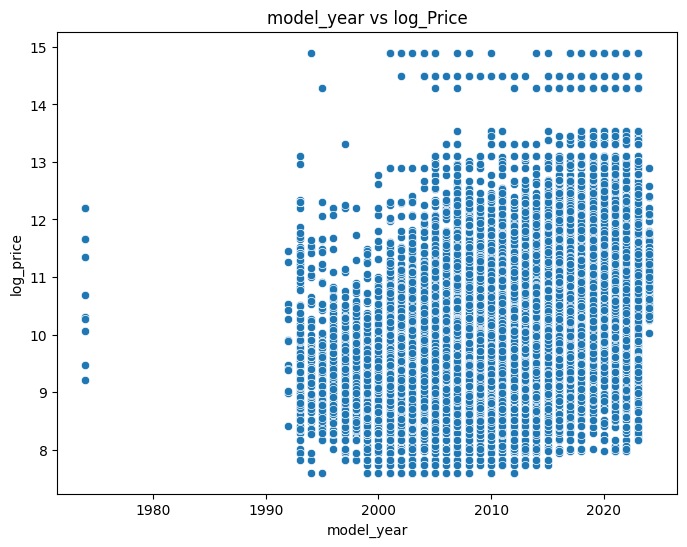

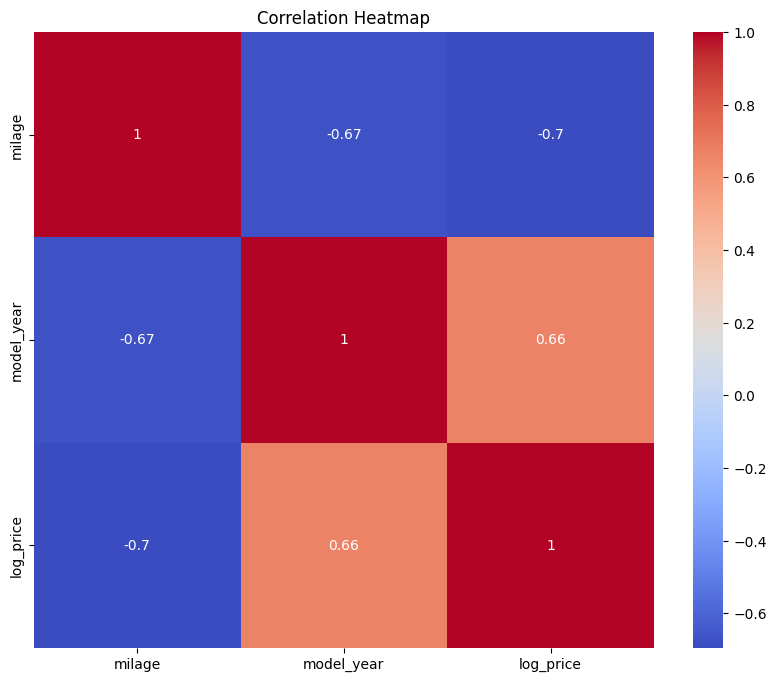

In [20]:
# 연속형
continuous_columns = ['milage', 'model_year']

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train[column], y=train['log_price'])
    plt.title(f'{column} vs log_Price')
    plt.show()

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(train[continuous_columns + ['log_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

